# Vapor Pressure Deficit

Create a Python **function** that calculates the vapor pressure deficit given air temperature and relative humidity as inputs.
Vapor pressure deficit is a measure of the atmospheric demand for water in and is tighly related plant transpiration and soil evaporation.
 
## Specifications

- Function must be named `vpdfun`
- Function example inputs must be 2D arrays of air temperature (degrees Celsius) and relative humidity (percentage)
- Temperature (T) input grid must range linearly from 0 to 40 degrees Celsius (including these values)
- Relative humidity (RH) grid must range linearly from 0 to 100 percent (including these values)
- Function must return a 2D numpy ndarray
- Must use Numpy module
- Resulting vapor pressure deficit values must be the result of each combination of T and RH.
- Resulting vapor pressure deficit values must have 2 decimal places
- Function must have the following documentation:
    - A brief description of the purpose of the function (20 words or less)
    - A brief description about the format of the input variable
    - Author's full name
    - Date of creation

## Equation

**Saturated vapor pressure:**
$e_{sat} = 0.611 \; exp\Bigg(\frac{17.502 T} {T + 240.97}\Bigg)$

**Actual vapor pressure**
$e_{act} = e_{sat} *\frac{RH}{100}$

**Vapor pressure deficit**
$VPD = e_{sat} - e_{act}$

where:
$e_{sat}$ is the saturated vapor pressure deficit (in kPa)
$e_{act}$ is the actual vapor pressure (in kPa)
$VPD$ is the vapor pressure deficit (in kPa)
$T$ is air temperature in degrees Celsius
$RH$ is relative humidity in percentage


## Example

Given a 5 by 5 temperature (T_grid) and relative humidty (RH_grid) 2D arrays:

```python
VPD = vpdfun(T_grid,RH_grid)
```

the code must print the following:

```
[[ 0.61  1.23  2.34  4.24  7.38]
 [ 0.46  0.92  1.75  3.18  5.54]
 [ 0.31  0.61  1.17  2.12  3.69]
 [ 0.15  0.31  0.58  1.06  1.85]
 [ 0.    0.    0.    0.   -0.  ]]
```

In [1]:
import numpy as np

def vpdfun(T,RH):
    """
    Function that calculates the air vapor pressure deficit.
    
    Inputs:
    T   = Air temperature        [Celsius]
    RH  = Air relative humidity  [%]
    
    Outputs:
    VPD = Vapor pressure deficit [kPa]
    
    Andres Patrignani - Feb 2019
    """

    e_sat = 0.611 * np.exp((17.502*T)/(T + 240.97)); # kPa
    e_act = e_sat * RH/100; # kPa
    return np.round(e_sat - e_act, 2)


In [2]:
N = 15 # Number of points

# Create vectors for each variable
T = np.linspace(0, 40, N)
RH = np.linspace(0, 100, N)

# Create mesh
T_grid,RH_grid = np.meshgrid(T,RH)

# Estimate vapor pressure deficit for each point in the temperature and relative humidy mesh
VPD = vpdfun(T_grid,RH_grid)
print(VPD)

# Check dimensions of input and output matrices
#print(T_grid.shape)
#print(RH_grid.shape)
#print(VPD.shape)

[[ 0.61  0.75  0.92  1.11  1.35  1.63  1.95  2.34  2.78  3.3   3.91  4.6
   5.41  6.33  7.38]
 [ 0.57  0.7   0.85  1.04  1.25  1.51  1.81  2.17  2.58  3.07  3.63  4.27
   5.02  5.87  6.85]
 [ 0.52  0.64  0.79  0.96  1.16  1.39  1.67  2.    2.39  2.83  3.35  3.95
   4.63  5.42  6.33]
 [ 0.48  0.59  0.72  0.88  1.06  1.28  1.54  1.84  2.19  2.6   3.07  3.62
   4.25  4.97  5.8 ]
 [ 0.44  0.54  0.65  0.8   0.96  1.16  1.4   1.67  1.99  2.36  2.79  3.29
   3.86  4.52  5.27]
 [ 0.39  0.48  0.59  0.72  0.87  1.05  1.26  1.5   1.79  2.12  2.51  2.96
   3.47  4.07  4.75]
 [ 0.35  0.43  0.52  0.64  0.77  0.93  1.12  1.34  1.59  1.89  2.23  2.63
   3.09  3.62  4.22]
 [ 0.31  0.38  0.46  0.56  0.67  0.81  0.98  1.17  1.39  1.65  1.95  2.3
   2.7   3.16  3.69]
 [ 0.26  0.32  0.39  0.48  0.58  0.7   0.84  1.    1.19  1.42  1.67  1.97
   2.32  2.71  3.16]
 [ 0.22  0.27  0.33  0.4   0.48  0.58  0.7   0.83  0.99  1.18  1.4   1.64
   1.93  2.26  2.64]
 [ 0.17  0.21  0.26  0.32  0.39  0.46  0.56  0.67  0

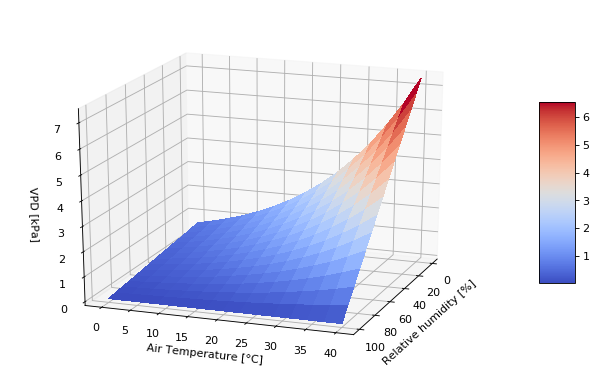

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

# Create figure
fig = plt.figure(figsize=(10, 6), dpi=80) # 10 inch by 6 inch dpi = dots per inch

# Get figure axes and convert it to a 3D projection
ax = fig.gca(projection='3d')

# Add surface plot to axes. Save this surface plot in a variable
surf = ax.plot_surface(RH_grid, T_grid, VPD, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add colorbar to figure based on ranges in the surf map.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Label x,y, and z axis
ax.set_xlabel('Relative humidity [%]')
ax.set_ylabel("Air Temperature [\N{DEGREE SIGN}C]")
ax.set_zlabel('VPD [kPa]')

# Set position of the 3D plot
ax.view_init(elev=20, azim=20) # elevation and azimuth. Change their value to see what happens.

plt.show()
#plt.savefig('')
